In [2]:
#import
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [4]:
## problem 3
# ##define the mini_batch_sgd 

#define sigmoid
def sigmoid(z):
    return 1/(1+np.exp(-z))
#define loss function
def theloss(X,y,theta):
    h=sigmoid(np.dot(X,theta))
    epsion=1e-10
    loss=-(np.dot(y.ravel(),np.log(h+epsion)+np.dot((1-y).ravel(),np.log(1-h+epsion))))
    return loss
#Mini-batch sgd:
# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)
def mini_batch_sgd(X,y,learning_rate=0.01,batch_size=32,iterations=1000):
    m,n=X.shape
    theta=np.zeros(n) # initialize parameters
    losses=[]
    for i in range(iterations):
        indices=np.random.permutation(m)
        X_shuffled=X[indices]
        y_shuffled=y[indices]
        
        for batch_start in range(0,m,batch_size):
            X_batch=X_shuffled[batch_start:batch_start+batch_size]
            y_batch=y_shuffled[batch_start:batch_start+batch_size]
            h=sigmoid(np.dot(X_batch,theta))
            gradient = np.dot(X_batch.T, (h - y_batch.ravel())) / batch_size
            theta=theta-gradient*learning_rate

        #compute the loss function:
        loss=theloss(X,y,theta)
        losses.append(loss)
    return theta,losses

(a) Download the Wisconsin Breast Cancer dataset from the UCI Machine Learning Repository 1 or
scikit-learn’s built-in datasets 2
(b) Split the dataset into train, validation, and test sets.
(c) Report the size of each class in your training (+ validation) set.

In [3]:

# Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Report the size of each class in the training + validation set
X_train_val = np.vstack((X_train, X_val))
y_train_val = np.hstack((y_train, y_val))
unique, counts = np.unique(y_train_val, return_counts=True)
class_distribution = dict(zip(unique, counts))

# Given class distribution in the training + validation set

# Extract the counts of negative and positive cases
negative_cases = class_distribution[np.int64(0)]
positive_cases = class_distribution[np.int64(1)]

# Calculate total and proportions
total_cases = negative_cases + positive_cases
negative_ratio = negative_cases / total_cases
positive_ratio = positive_cases / total_cases

# Print results
print("Number of negative cases:", negative_cases)
print("Number of positive cases:", positive_cases)
print("Proportion of negative cases: {:.2%}".format(negative_ratio))
print("Proportion of positive cases: {:.2%}".format(positive_ratio))

print("Class distribution in training (+ validation) set:", class_distribution)

Number of negative cases: 169
Number of positive cases: 286
Proportion of negative cases: 37.14%
Proportion of positive cases: 62.86%
Class distribution in training (+ validation) set: {np.int64(0): np.int64(169), np.int64(1): np.int64(286)}


In [5]:
# Add intercept term to feature matrix (for all sets)


X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

# Set hyperparameters

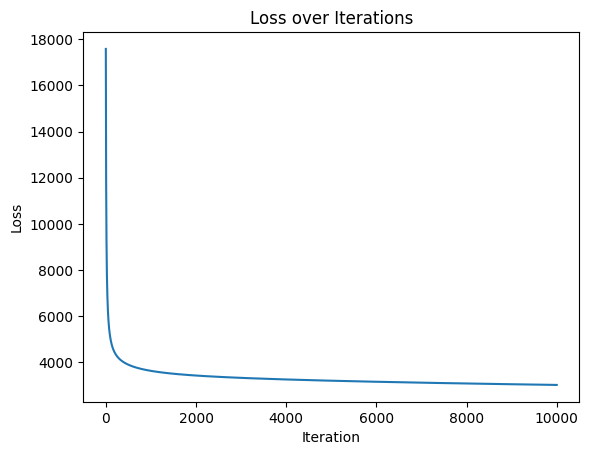


Test Set Performance:
Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9859154929577465
F1 Score: 0.9790209790209791

Summary:
1. The model was trained using a learning rate of 0.001 and a batch size of 16
2. The loss decreased over iterations, indicating the model was learning.
3. Final performance on the test set shows an accuracy of 0.9737 with precision, recall, and F1 scores as listed above.


In [12]:
# Set hyperparameters
learning_rate = 0.001
batch_size = 16
iterations = 10000

# Train the logistic regression model
theta, losses = mini_batch_sgd(X_train, y_train, learning_rate=learning_rate, batch_size=batch_size, iterations=iterations)

# Plot the loss over iterations
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.show()

# Evaluate the model on the test set
y_pred = sigmoid(np.dot(X_test, theta)) >= 0.5  # Threshold at 0.5

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nTest Set Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Summarize findings
print("\nSummary:")
print("1. The model was trained using a learning rate of", learning_rate, "and a batch size of", batch_size)
print("2. The loss decreased over iterations, indicating the model was learning.")
print("3. Final performance on the test set shows an accuracy of", round(accuracy, 4), 
      "with precision, recall, and F1 scores as listed above.")



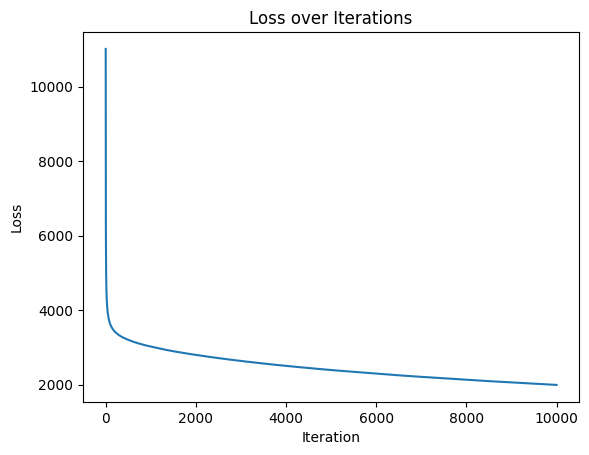


Test Set Performance:
Accuracy: 0.9824561403508771
Precision: 0.9726027397260274
Recall: 1.0
F1 Score: 0.9861111111111112

Summary:
1. The model was trained using a learning rate of 0.01 and a batch size of 16
2. The loss decreased over iterations, indicating the model was learning.
3. Final performance on the test set shows an accuracy of 0.9825 with precision, recall, and F1 scores as listed above.


In [13]:
#experiment with different hyperparameters

learning_rate = 0.01
batch_size = 16
iterations = 10000

# Train the logistic regression model
theta, losses = mini_batch_sgd(X_train, y_train, learning_rate=learning_rate, batch_size=batch_size, iterations=iterations)

# Plot the loss over iterations
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.show()

# Evaluate the model on the test set
y_pred = sigmoid(np.dot(X_test, theta)) >= 0.5  # Threshold at 0.5

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nTest Set Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Summarize findings
print("\nSummary:")
print("1. The model was trained using a learning rate of", learning_rate, "and a batch size of", batch_size)
print("2. The loss decreased over iterations, indicating the model was learning.")
print("3. Final performance on the test set shows an accuracy of", round(accuracy, 4), 
      "with precision, recall, and F1 scores as listed above.")



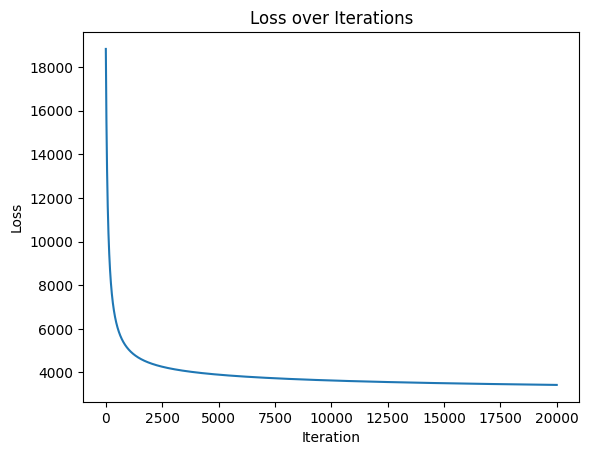


Test Set Performance:
Accuracy: 0.9824561403508771
Precision: 0.9726027397260274
Recall: 1.0
F1 Score: 0.9861111111111112

Summary:
1. The model was trained using a learning rate of 0.0001 and a batch size of 16
2. The loss decreased over iterations, indicating the model was learning.
3. Final performance on the test set shows an accuracy of 0.9825 with precision, recall, and F1 scores as listed above.


In [14]:
#experiment
learning_rate = 0.0001
batch_size = 16
iterations = 20000

# Train the logistic regression model
theta, losses = mini_batch_sgd(X_train, y_train, learning_rate=learning_rate, batch_size=batch_size, iterations=iterations)

# Plot the loss over iterations
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.show()

# Evaluate the model on the test set
y_pred = sigmoid(np.dot(X_test, theta)) >= 0.5  # Threshold at 0.5

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nTest Set Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Summarize findings
print("\nSummary:")
print("1. The model was trained using a learning rate of", learning_rate, "and a batch size of", batch_size)
print("2. The loss decreased over iterations, indicating the model was learning.")
print("3. Final performance on the test set shows an accuracy of", round(accuracy, 4), 
      "with precision, recall, and F1 scores as listed above.")



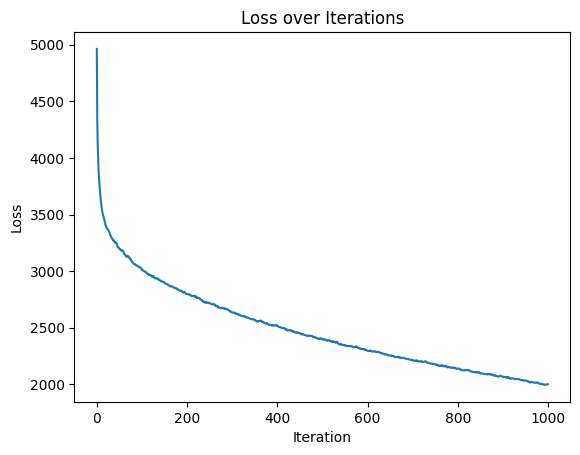


Test Set Performance:
Accuracy: 0.9824561403508771
Precision: 0.9726027397260274
Recall: 1.0
F1 Score: 0.9861111111111112

Summary:
1. The model was trained using a learning rate of 0.1 and a batch size of 16
2. The loss decreased over iterations, indicating the model was learning.
3. Final performance on the test set shows an accuracy of 0.9825 with precision, recall, and F1 scores as listed above.


In [19]:
#experiment
learning_rate = 0.1
batch_size = 16
iterations = 1000

# Train the logistic regression model
theta, losses = mini_batch_sgd(X_train, y_train, learning_rate=learning_rate, batch_size=batch_size, iterations=iterations)

# Plot the loss over iterations
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.show()

# Evaluate the model on the test set
y_pred = sigmoid(np.dot(X_test, theta)) >= 0.5  # Threshold at 0.5

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nTest Set Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Summarize findings
print("\nSummary:")
print("1. The model was trained using a learning rate of", learning_rate, "and a batch size of", batch_size)
print("2. The loss decreased over iterations, indicating the model was learning.")
print("3. Final performance on the test set shows an accuracy of", round(accuracy, 4), 
      "with precision, recall, and F1 scores as listed above.")



In [20]:
#overall summary

print('Summary:')
print('''1.When learning rate gets smaller,function converges slower
      2With the same learning rate and batch size,program behaviors better when iteration gets larger
      3.this is comparatively a small set, so batch size shouldn't be too large
      ''')

Summary:
1.When learning rate gets smaller,function converges slower
      2With the same learning rate and batch size,program behaviors better when iteration gets larger
      3.this is comparatively a small set, so batch size shouldn't be too large
      
